# Exercise 4.9 Part II Data Viz

This script contains

1. Import libraries
2. Bar Chart - orders and days of the week
3. Histogram and Scatter Plot - grocery item prices
4. Line chart - orders by days of the week
5. Histogram - frequency of orders by hours of the day
6. Line chart - age and number of dependants 
7. Line chart - prices and hour of the day
8. Line chart - age and number of dependants
9. Scatter plot - age and income

# 01. Import Libraries

In [2]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Path to IC folders
path = r"C:\Users\alabaro\OneDrive - DAI\Documents\Aug_2023 Instacart Basket Analysis"

In [4]:
# importing orders_products_merged_v4 from Prepared Data folder
df_ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
df = df_ords_prods_cust_merged

In [6]:
# check output

df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,sex,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,normal activity


# 02. Create Bar Chart

<Axes: xlabel='orders_day_of_week'>

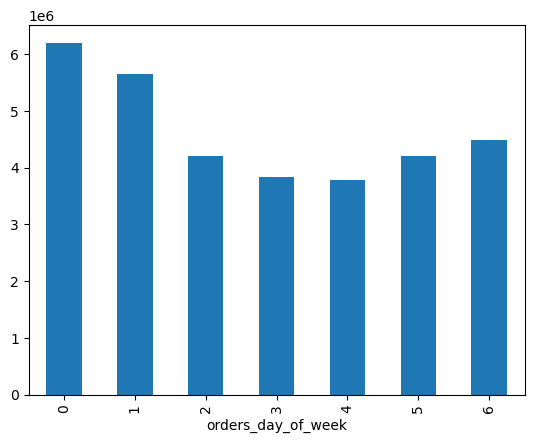

In [7]:
# create bar chart for orders by day of the week

df['orders_day_of_week'].value_counts().sort_index().plot.bar()

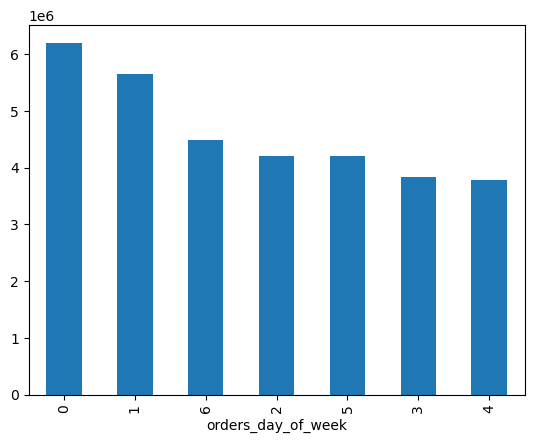

In [8]:
# export visualization

bar = df['orders_day_of_week'].value_counts().plot.bar()

In [9]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 03. Create Histogram and Scatterplot

<Axes: ylabel='Frequency'>

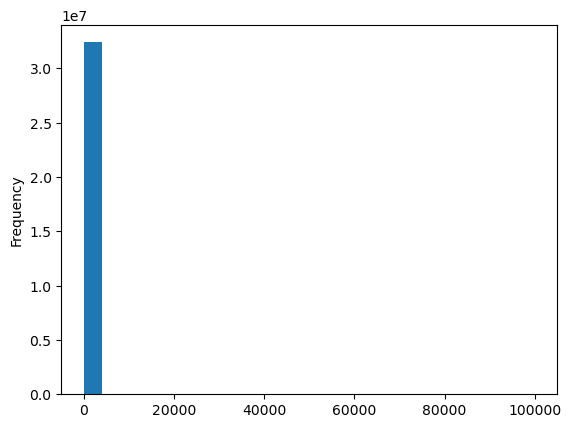

In [10]:
# histogram from prices

df['prices'].plot.hist(bins = 25)

In [11]:
df['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [12]:
df['prices'].mean()

11.980225638383438

In [13]:
df['prices'].median()

7.4

In [14]:
df['prices'].max()

99999.0

The histogram does not look correct. The mean is 11.9 and the median is 7.4, but the max is 99999. Outliers are skewing the data and should be addressed.

<Axes: xlabel='prices', ylabel='prices'>

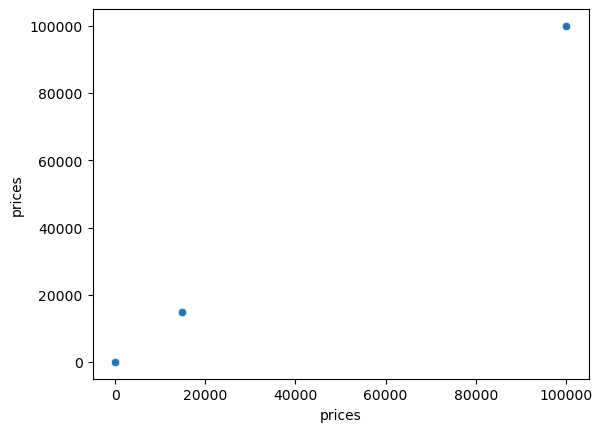

In [15]:
# create scatterplot to see outliers

sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [16]:
# check if there are prices significantly above a normal grocery store item 

df.loc[df['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,sex,state,age,date_joined,n_dependants,fam_status,income,region,activity_flag
7805,1435153,1519,prior,26,2,11,6.0,21553,15,0,...,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Northeast,normal activity
7806,1066435,1519,prior,32,3,10,5.0,21553,28,1,...,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Northeast,normal activity
15143,1697208,2409,prior,33,1,19,5.0,21553,1,0,...,Frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074,West,normal activity
20264,965345,3531,prior,27,2,19,8.0,33664,2,0,...,Frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776,West,normal activity
20497,2943740,3793,prior,1,2,9,NaN,21553,3,0,...,Regular customer,Male,Louisiana,59,8/23/2019,3,married,182933,West,normal activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,prior,4,1,17,13.0,33664,2,1,...,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497,Northeast,normal activity
32307882,1179092,131671,prior,12,4,9,15.0,33664,1,0,...,Regular customer,Female,Rhode Island,35,8/4/2018,0,single,86490,Northeast,normal activity
32310810,1226705,39667,prior,7,2,15,20.0,33664,14,0,...,Non frequent customer,Male,Rhode Island,78,5/8/2019,2,married,195077,Northeast,normal activity
32330048,3000037,95105,prior,2,4,19,22.0,33664,4,0,...,Frequent customer,Female,South Carolina,48,1/18/2017,2,married,398880,South,low activity


There are 5127 values that are above 100 which should be removed or assigned another value that does not skew the dataset.

In [17]:
# replace any values above 100 with new value

df.loc[df['prices'] >100, 'prices'] = np.nan

In [18]:
# check max value

df['prices'].max()

25.0

Now all of the prices above 100 are replaced with values that will not skew the data. 

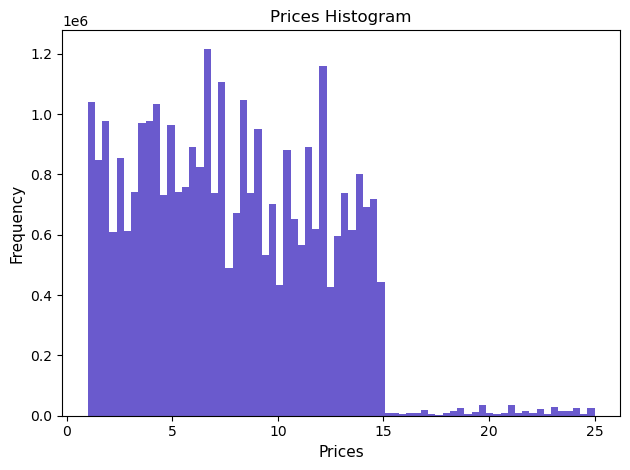

In [19]:
# retry histogram on prices

df['prices'].plot.hist(bins = 70,color = 'slateblue')
plt.title("Prices Histogram",fontsize=12)
plt.xlabel("Prices", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.tight_layout()

This histogram looks more realistic with most prices falling between $1 and $15 and a few that are more than $15. 

In [ ]:
# export histogram

hist = df['prices'].plot.hist(bins = 70)

In [34]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 04. Create Line Chart

In [20]:
# Set seed for random number generator

np.random.seed(4)

In [21]:
# Create list of True/False values to test np.random.rand(len)<=7

dev = np.random.rand(len(df)) <= 0.7

In [22]:
# check output

dev

array([False,  True, False, ...,  True,  True,  True])

In [24]:
# store 70% of samples in dataframe big 

big = df[dev]

In [25]:
# store 30% of samples in dataframe big 

small = df[~dev]

In [26]:
# check output

len(df)

32404859

In [27]:
len(big) + len(small)

32404859

Length of big + small dataframes add up to the ords_prods_cust_merged dataframe. 

In [28]:
# to improve processing time only use necessary columns in sample set

df_2 = small[['orders_day_of_week','prices']]

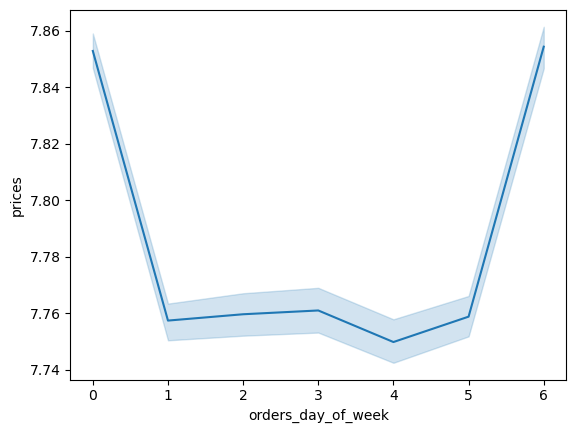

In [29]:
# plot line chart 

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [30]:
# export line graph

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow.png'))

# 05. Histogram of hour of the day

<Axes: ylabel='Frequency'>

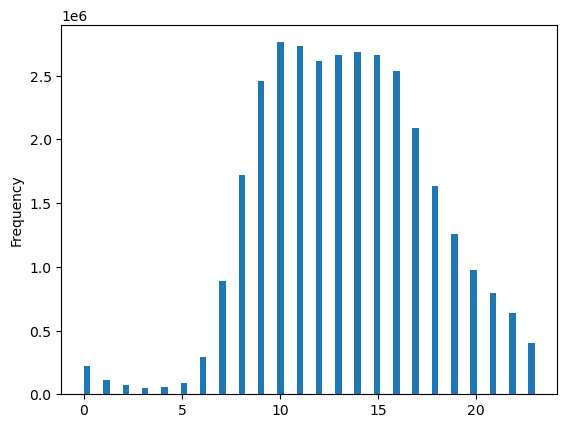

In [31]:
# histogram for order hour of the day

df['order_hour_of_day'].plot.hist(bins = 70)
plt.title("Customer Family Status Groups",fontsize=12)
plt.xlabel("Family Status", fontsize=11)
plt.ylabel("Frequency",fontsize=11)
plt.tight_layout()

The histogram shows the frequency of orders by hour of the day. Lowest number of orders happens at 3am and peaks at 10am. The busiest time is from 10am to 4pm. 

# 06. Bar chart customer loyalty

<Axes: xlabel='loyalty_flag'>

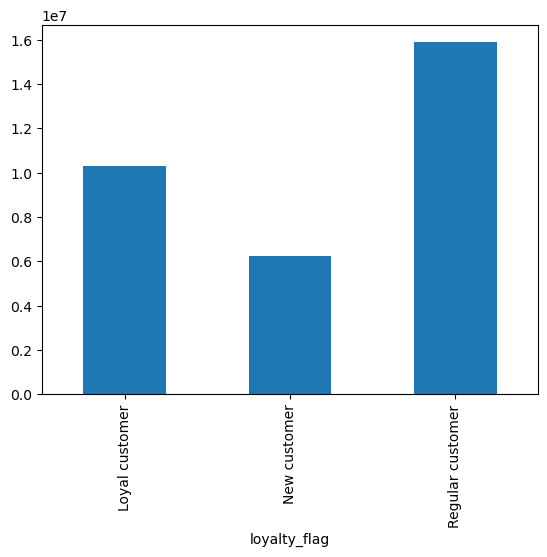

In [32]:
# create bar chart for customer loyalty

df['loyalty_flag'].value_counts().sort_index().plot.bar()

The majority (1.6million) of customers are regular customers. About 1/3 (1million) customers are loyal customers.

In [ ]:
bar_2 = df['loyalty_flag'].value_counts().sort_index().plot.bar()

In [45]:
# export bar_2 to Visualizations folder

bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

# 07. Line chart for prices and order hour of day

In [33]:
# to improve processing time only use necessary columns in sample set

df_3 = small[['order_hour_of_day','prices']]

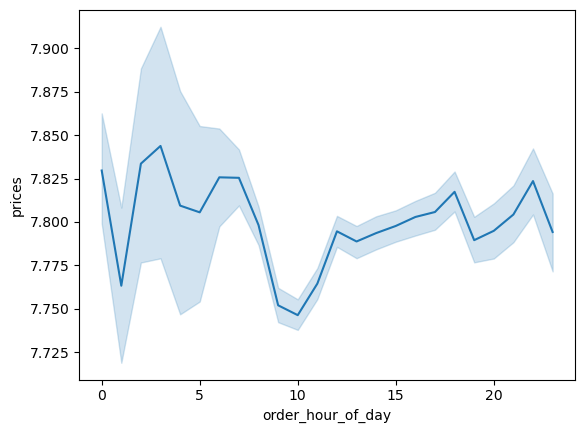

In [34]:
# plot line chart 

line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

Price levels seem to vary greatly in the early morning hours from midnight to 7am. The most expensive items are purchase around midnight. During peak shopping hours from 10am to 3pm, the prices are lower. 

In [46]:
# export line_2 to Visualizations folder

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_day_prices.png'))

# 08. Line chart for age and number of dependents

In [ ]:
# check output 

df.head(5)

In [39]:
# to improve processing time only use necessary columns in sample set

df_4 = small[['n_dependants','age']]

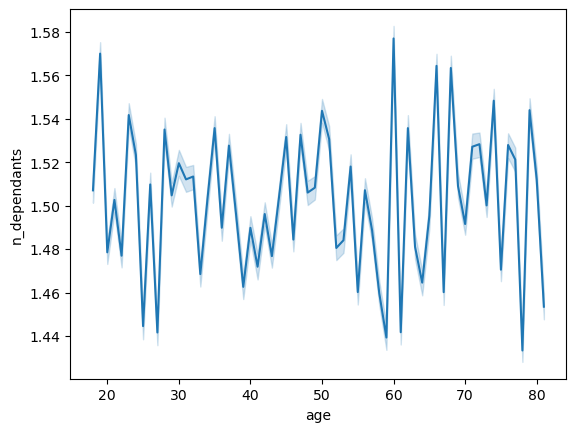

In [51]:
# plot line chart 

line_3 = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants')

There doesn't seem to be any correlation between age and number of dependants. Most people have 1-2 dependants. 

In [52]:
# export line_3 to Visualizations folder

line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_n_dependents.png'))

# 09. Scatter plot age and income

In [41]:
# to improve processing time only use necessary columns in sample set

df_5 = small[['income','age']]

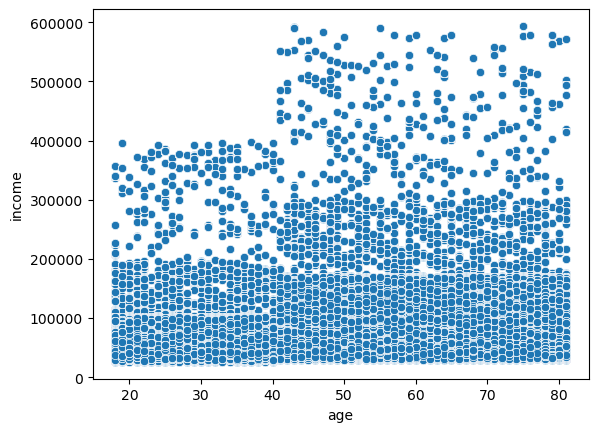

In [42]:
# plot scatter chart 

scatter = sns.scatterplot(data = df_5, x = 'age',y = 'income')

In terms of age and income, there is a clear increase in income from the age of 40 and older compared to people age 20-40. Most customers are 40 years or older. 

In [53]:
# export scatter to Visualizations folder

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))